<a href="https://colab.research.google.com/github/MesudeOmer/MesudeOmer/blob/main/ResNet50_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import ResNet50
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests
from keras_preprocessing.image import img_to_array

In [ ]:
model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 2s 0us/step


In [ ]:
def prepare_image(image,target):
  image = image.resize(target)
  image = img_to_array(image)
  image = np.expand_dims(image,axis=0)
  image = imagenet_utils.preprocess_input(image)
  return image

In [ ]:
ImageURL="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqJCPxDv1NUEBBUgfOzFtw1pCNjPKKpbfB2A&usqp=CAU"

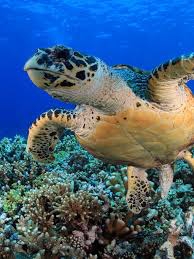

In [ ]:
response = requests.get(ImageURL)
image= Image.open(BytesIO(response.content))
image

In [ ]:
data = {"success":False}

pre_image = prepare_image(image,target=(224,224))

preds = model.predict(pre_image)

results= imagenet_utils.decode_predictions(preds)

data["prediction"] = []

for (imagenetID , label , prob) in results[0] :
  r= {"label":label , "prebobality":float(prob)}
  data["prediction"].append(r)

data["success"] = True
print(data)

35363/35363 [==============================] - 0s 0us/step
{'success': True, 'prediction': [{'label': 'loggerhead', 'prebobality': 0.9656850695610046}, {'label': 'leatherback_turtle', 'prebobality': 0.032241977751255035}, {'label': 'terrapin', 'prebobality': 0.0009079236187972128}, {'label': 'sea_snake', 'prebobality': 0.00028538721380755305}, {'label': 'coral_reef', 'prebobality': 0.0002509176265448332}]}
